# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [41]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [42]:
import numpy as np
import pandas as pd

# Define parameters
num_data_points = 10  # Number of data points
num_features = 5  # Number of features for each data point

# Generate random data points with multiple features
data = np.random.rand(num_data_points, num_features)

# Create column names for DataFrame
column_names = [f"Feature_{i+1}" for i in range(num_features)]

# Create DataFrame
df = pd.DataFrame(data, columns=column_names)

# Display the DataFrame
print("Generated DataFrame:")
print(df)


Generated DataFrame:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0   0.263770   0.690581   0.973501   0.489393   0.510788
1   0.476334   0.907943   0.188282   0.945738   0.710707
2   0.070542   0.470390   0.669790   0.687250   0.331723
3   0.134169   0.953284   0.219709   0.941974   0.471658
4   0.403128   0.754935   0.453375   0.503005   0.527416
5   0.200276   0.448820   0.450011   0.259764   0.698050
6   0.402021   0.319133   0.427672   0.623412   0.516177
7   0.776339   0.424168   0.864176   0.460029   0.032139
8   0.506033   0.946792   0.144290   0.692616   0.194732
9   0.584921   0.650883   0.303779   0.199360   0.838966


In [43]:
def GUC_Distance ( Cluster_Centroids, Data_Points, Distance_Type ):
    if type(Data_Points) != np.ndarray:
        Data_Points = np.array(Data_Points)
    if Distance_Type == "Euclidean":
        distances = []
        for point in Data_Points:
            centroid_distances = []
            for centroid in Cluster_Centroids:
                distance = np.sqrt(np.sum((np.array(point) - np.array(centroid)) ** 2))
                centroid_distances.append(distance)
            distances.append(centroid_distances)
        distances = np.array(distances)
        print(distances)
    elif(Distance_Type=="Pearson"):
          
        distances = []
        
        
        for data_point in Data_Points:
            centroid_distances = []
            for centroid in Cluster_Centroids:
                
                pearson_corr, _ = pearsonr(centroid, data_point)
                
                distance = 1 - pearson_corr
                centroid_distances.append(distance)
            distances.append(centroid_distances)
            
        
        
                    
                
    return distances 

Cluster_Centroids = np.array([[0.456, 0.654, 0.222], [0.345, 0.123, 0.876]])
Data_points = np.array([[0.654, 0.111, 0.823], [0.234, 0.789, 0.567], [0.456, 0.789, 0.123], [0.987, 0.456, 0.654], [0.321, 0.234, 0.987]])

GUC_Distance(Cluster_Centroids,Data_points,"Euclidean")


[[0.83381893 0.31374193]
 [0.43189582 0.74253485]
 [0.16740968 1.01137827]
 [0.71259315 0.75652958]
 [0.88309116 0.15880176]]


array([[0.83381893, 0.31374193],
       [0.43189582, 0.74253485],
       [0.16740968, 1.01137827],
       [0.71259315, 0.75652958],
       [0.88309116, 0.15880176]])

> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [44]:
def GUC_Kmean (Cluster_Centroids, Data_points, Distance_Type):
    if type(Data_points) == pd.DataFrame:
        Data_points=Data_points.values
    while True:
        distance_matrix = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type)
        distance_matrix1=np.array(distance_matrix)
        min_values=[]
        min_indices=[]
        for arr in distance_matrix1:
            min_index = np.argmin(arr)
            min_indices.append(min_index)
            min_value = arr[min_index]
            min_values.append(min_value)
        min_values=np.array(min_values)
        min_indices=np.array(min_indices)
        clusters=[]
        for value in np.unique(min_indices):
          clusters.append([])
        for i, value in enumerate(min_indices):
          clusters[value].append(Data_points[i])
        new_centroids = []
        for cluster in clusters:
            if cluster:  # Check if the cluster is not empty
                # Calculate the mean of the points in the cluster
                mean_point = np.mean(cluster, axis=0)
                new_centroids.append(mean_point)
        mean_square_distances = []
        for cluster in clusters:
            distances = []
            for point in cluster:
                # Calculate the Euclidean distance for each data point in the cluster
                distance = np.linalg.norm(point - np.mean(cluster, axis=0))
                distances.append(distance)
            # Calculate the mean square distance for the cluster
            mean_square_distance = np.mean(np.square(distances))
            mean_square_distances.append(mean_square_distance)
        # Calculate distortion function (cluster metric)
        Cluster_Metric = np.sum(np.square(mean_square_distances))
        # Calculate distortion function (cluster metric)
        Cluster_Metric = np.sum(np.square(mean_square_distances))
        print(Cluster_Metric)
        # Check if centroids have changed
        if np.array_equal(new_centroids, Cluster_Centroids):
            break  # Stop if centroids have not changed

        Cluster_Centroids = new_centroids  # Update centroids for next iteration

        Final_Cluster_Distance = Cluster_Centroids  # Calculate final cluster distance if needed
        return [Final_Cluster_Distance , Cluster_Metric]    

In [45]:
Cluster_Centroids1 = np.array([[0.456, 0.654, 0.222,0.43,0.94], [0.345, 0.123, 0.876,0.32,0.84]])

GUC_Kmean( Cluster_Centroids1, df, "Pearson")

0.07363848634378091


[[array([0.3841437 , 0.77710935, 0.29324088, 0.59040961, 0.57358806]),
  array([0.37816813, 0.4760681 , 0.73378481, 0.56502102, 0.34770676])],
 0.07363848634378091]

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [46]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [47]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            
            print(km.labels_)
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def display_clusters_2d(data, cluster_result):
    """
    Display 2D clusters using custom KMeans.

    Parameters:
        data (numpy.ndarray): Input data with shape (n_samples, 2).
        cluster_result (list): Result of custom KMeans algorithm, containing cluster centroids and cluster metric.

    Returns:
        None (displays the plot).
    """
    if data.shape[1] != 2:
        raise ValueError("Input data must have exactly 2 features for 2D clustering.")

    cluster_centroids, _ = cluster_result
    num_clusters = len(cluster_centroids)

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Color palette for clusters

    plt.figure(figsize=(8, 8))
    for i in range(num_clusters):
        plt.scatter(cluster_centroids[i][0], cluster_centroids[i][1], marker='x', c='black', s=100, label=f'Center {i + 1}')

    plt.scatter(data[:, 0], data[:, 1], c='blue', alpha=0.2, label='Data Points')
    
    plt.title('2D Clustering using Custom KMeans')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()


> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

[[0.62359644 1.85258733 1.25406486]
 [0.82397902 1.99540912 1.0981904 ]
 [1.02022257 2.0893562  0.92350414]
 [1.19965997 2.13208132 0.74010934]
 [1.35459954 2.12251899 0.56620944]
 [1.47965617 2.06090757 0.43998934]
 [1.57092843 1.94878432 0.4233039 ]
 [1.62572635 1.78895382 0.52800556]
 [1.64248153 1.5854351  0.69473141]
 [1.62072027 1.34340255 0.87796149]
 [1.56105831 1.06916936 1.0559717 ]
 [1.46520788 0.77041895 1.21726445]
 [1.33600952 0.45803234 1.35458297]
 [1.17753621 0.1715581  1.46287151]
 [0.99540728 0.26479443 1.53855834]
 [0.79774255 0.57259315 1.57929234]
 [0.5982971  0.88172706 1.58384617]
 [0.42753875 1.17253877 1.55208409]
 [0.35781274 1.43582676 1.48495898]
 [0.44614052 1.66447365 1.38453549]]
0.3573958322452202


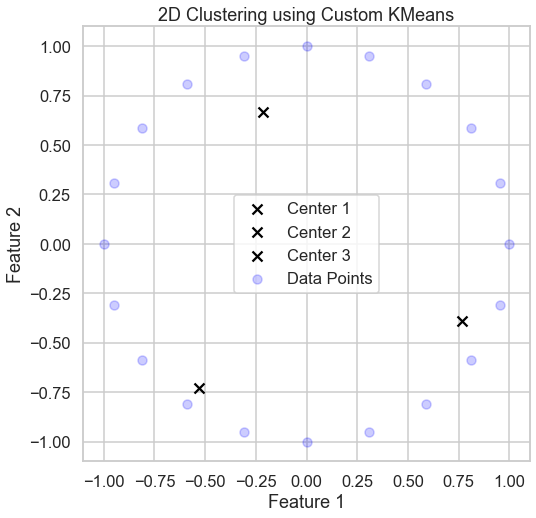

In [49]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Number of clusters
num_clusters = 3

# Generate random cluster centroids within the range of data points
# For example, random centroids within the range [-1, 1] for both x and y coordinates
Cluster_Centroids = np.random.uniform(low=-1, high=1, size=(num_clusters, 2))

km1=GUC_Kmean(Cluster_Centroids,X1,"Euclidean")
display_clusters_2d(X1,km1)


> #### 2.3. Example 2 : Multi blob Data Gen and display 

[[ 0.51559865  4.01436706  8.24405505 12.48253759 16.72312906]
 [ 1.65502882  2.77755468  6.97785781 11.21009319 15.44803803]
 [ 0.33113127  4.57377196  8.81641264 13.05905333 17.30169402]
 ...
 [17.98296694 13.74254377  9.5041001   5.27241198  1.12638243]
 [16.33942791 12.10071402  7.86623514  3.65075757  0.88227336]
 [16.33371361 12.09289121  7.85403307  3.62403824  0.76254232]]
17.52100214253117


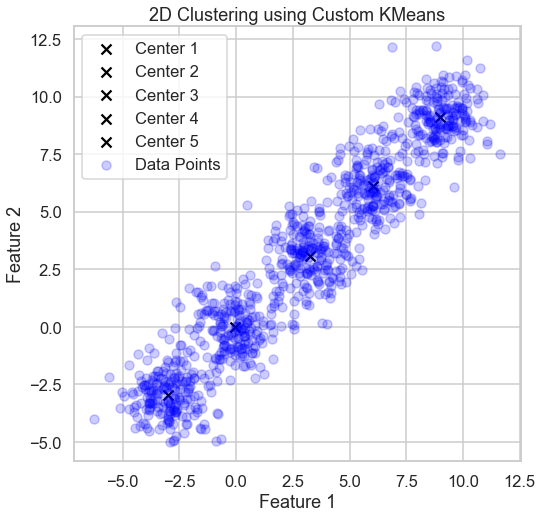

In [50]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X2, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

km2=GUC_Kmean(centers,X2,"Euclidean")
display_clusters_2d(X2,km2)

#### 2.3. Example 3 : moons Data Gen and display 

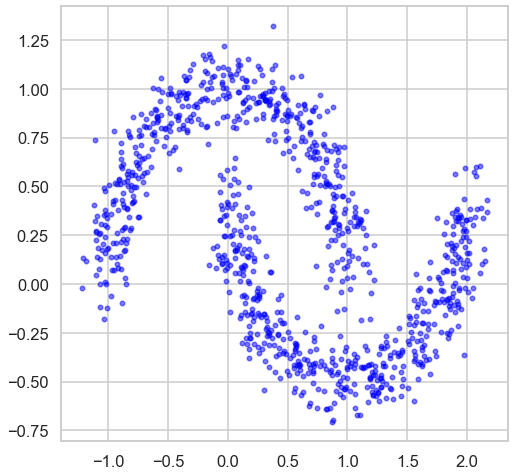

In [51]:
n_samples = 1000
X3, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X3)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [52]:
def GUC_Kmean2(Cluster_Centroids, Data_points, Distance_Type):
    if type(Data_points) == pd.DataFrame:
        Data_points = Data_points.values
    while True:
        distance_matrix = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type)
        distance_matrix1 = np.array(distance_matrix)
        min_values = []
        min_indices = []
        for arr in distance_matrix1:
            min_index = np.argmin(arr)
            min_indices.append(min_index)
            min_value = arr[min_index]
            min_values.append(min_value)
        min_values = np.array(min_values)
        min_indices = np.array(min_indices)
        clusters = [[] for _ in range(len(Cluster_Centroids))]
        for i, value in enumerate(min_indices):
            clusters[value].append(Data_points[i])
        new_centroids = []
        mean_square_distances = []
        for cluster in clusters:
            if cluster:
                mean_point = np.mean(cluster, axis=0)
                new_centroids.append(mean_point)
                distances = np.linalg.norm(cluster - mean_point, axis=1)
                mean_square_distance = np.mean(distances ** 2)
                mean_square_distances.append(mean_square_distance)
        if np.array_equal(new_centroids, Cluster_Centroids):
            break
        Cluster_Centroids = new_centroids
        Final_Cluster_Distance = Cluster_Centroids
        Cluster_Metric = np.sum(np.square(mean_square_distances))
        return [Final_Cluster_Distance, Cluster_Metric]


[[1.34138999 0.97132592]
 [1.32778284 1.27882606]
 [1.28973215 1.56355269]
 [1.2289352  1.81443015]
 [1.14830943 2.02356618]
 [1.05222109 2.18497521]
 [0.9469126  2.29424329]
 [0.84121641 2.34845002]
 [0.74744525 2.34616232]
 [0.68140579 2.28744048]
 [0.65863498 2.17383782]
 [0.68565289 2.00839458]
 [0.75479675 1.79564693]
 [0.85020317 1.54171598]
 [0.95630153 1.25468117]
 [1.06111165 0.94600647]
 [1.15606387 0.63678304]
 [1.23510409 0.39220837]
 [1.29400647 0.40566892]
 [1.32996741 0.66080327]]


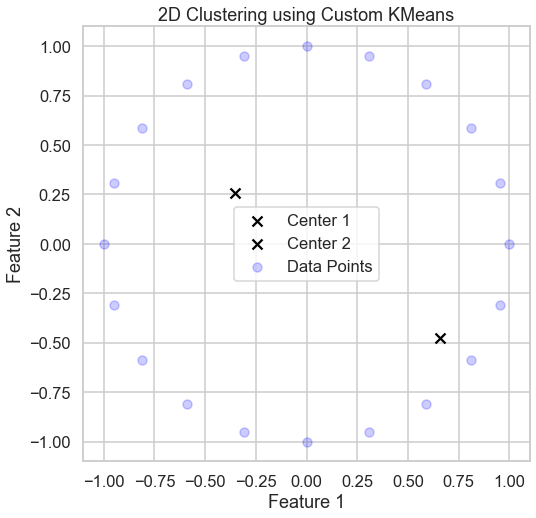

[[1.70608263 0.61570733 2.07699394]
 [1.56288048 0.39969358 1.93938658]
 [1.3815415  0.27307716 1.75467773]
 [1.16669108 0.36315622 1.52765035]
 [0.9239702  0.57103313 1.26436882]
 [0.66029383 0.79884355 0.97241356]
 [0.38582341 1.01860258 0.66220739]
 [0.14297673 1.21868098 0.35644841]
 [0.25160733 1.3918441  0.20417358]
 [0.52273855 1.53278889 0.43677139]
 [0.79356101 1.63751901 0.7481373 ]
 [1.04778892 1.70317617 1.05470041]
 [1.27741932 1.72800257 1.33967135]
 [1.47624149 1.71133912 1.59370564]
 [1.63912662 1.65362789 1.8096919 ]
 [1.76195036 1.55641029 1.9819246 ]
 [1.84162898 1.42232655 2.10596644]
 [1.87617021 1.2551417  2.17865963]
 [1.86471198 1.05987453 2.19816433]
 [1.80754016 0.84328064 2.16398799]]


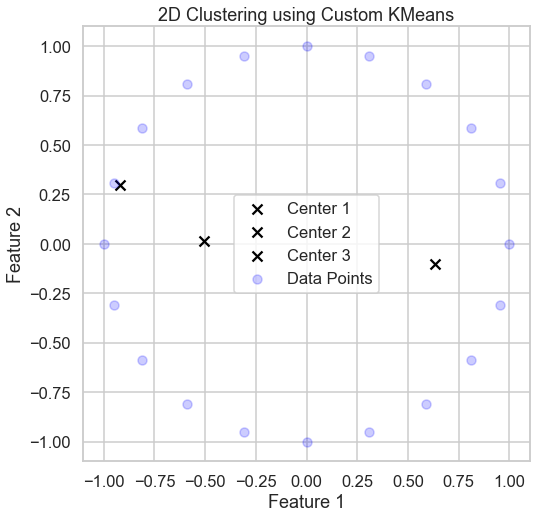

[[1.30103187 1.65017706 1.03825419 1.73914369]
 [1.26756755 1.49589846 1.09584458 1.86896625]
 [1.21280144 1.305287   1.14373724 1.95277022]
 [1.13950009 1.08329856 1.17866495 1.98849189]
 [1.05181992 0.83600267 1.19845054 1.97525159]
 [0.95566155 0.571252   1.20192716 1.91337536]
 [0.85921343 0.30379406 1.18889434 1.80438695]
 [0.77352153 0.14034132 1.16011049 1.65097029]
 [0.71221353 0.34007283 1.11732143 1.45690356]
 [0.68840514 0.60890043 1.06332555 1.22696642]
 [0.70820923 0.87181095 1.00206999 0.96682306]
 [0.76649641 1.11598677 0.93874421 0.68288562]
 [0.85050391 1.33392822 0.87976199 0.38217281]
 [0.94645855 1.51973777 0.83238511 0.07257827]
 [1.0430336  1.66860367 0.80363694 0.24030974]
 [1.13179293 1.77674135 0.79842792 0.54622552]
 [1.20664681 1.84142549 0.81770795 0.83878206]
 [1.26329279 1.86103277 0.85805576 1.1107046 ]
 [1.29884415 1.83507197 0.91307659 1.3552858 ]
 [1.31161832 1.76419356 0.97542546 1.56649961]]


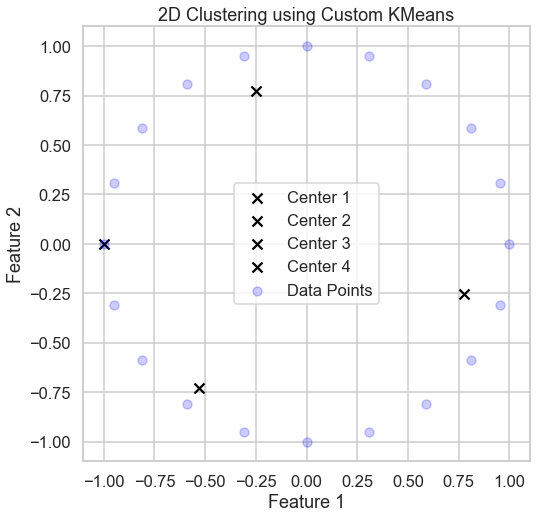

[[1.11736252 1.10031002 1.4737917  0.50402601 1.31036765]
 [1.23383969 1.33235795 1.53430672 0.80835497 1.23458866]
 [1.32841974 1.53185498 1.56026182 1.09346897 1.13792047]
 [1.39706589 1.69379906 1.55085757 1.351915   1.02541451]
 [1.43712509 1.8141584  1.50638236 1.57720405 0.90436134]
 [1.44713224 1.88994619 1.42822009 1.7637387  0.78543839]
 [1.42672958 1.91928465 1.31889593 1.90690212 0.6843084 ]
 [1.37664986 1.90144735 1.18220447 2.00315683 0.62170128]
 [1.29875206 1.83687591 1.0235433  2.05012636 0.61613368]
 [1.19613291 1.72716985 0.85079027 2.04665149 0.66953515]
 [1.07338589 1.57505026 0.67669232 1.99281797 0.7653507 ]
 [0.93717441 1.38430046 0.52524028 1.88995448 0.88239215]
 [0.79746928 1.15969211 0.44221888 1.74060084 1.00397314]
 [0.66997252 0.90692348 0.47414691 1.5484481  1.11863763]
 [0.57907489 0.63268852 0.6006552  1.3182538  1.21858756]
 [0.55359241 0.34578732 0.76821993 1.05574214 1.29842659]
 [0.6042342  0.08838506 0.94365671 0.76752198 1.35445453]
 [0.71097921 0

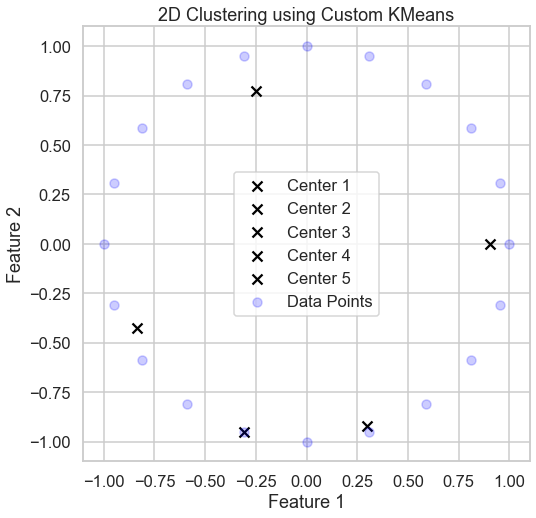

[[0.65888428 1.66717182 1.7582642  1.93162113 0.43913172 0.89699516]
 [0.6960443  1.62115061 1.56450575 2.00245901 0.68545621 0.82220103]
 [0.77252252 1.53692884 1.33238308 2.02399705 0.92730718 0.76550945]
 [0.87182258 1.41688413 1.06771471 1.99570468 1.15100007 0.73714423]
 [0.978951   1.26454347 0.77728314 1.91827887 1.34872162 0.74318066]
 [1.0826792  1.08474179 0.46921224 1.79362706 1.51468301 0.78226443]
 [1.17502731 0.88413366 0.15992903 1.62482049 1.64436239 0.84640771]
 [1.2503683  0.67291572 0.19866485 1.4160194  1.73434093 0.92493055]
 [1.30479972 0.47140983 0.51036429 1.17237256 1.78228459 1.00776686]
 [1.33578413 0.33540856 0.81667365 0.89989656 1.78695931 1.0867507 ]
 [1.34196229 0.36656726 1.10414249 0.60535227 1.74824508 1.15568245]
 [1.32306978 0.534513   1.36489757 0.29625918 1.66713746 1.21003623]
 [1.27992197 0.74275378 1.59228734 0.03236545 1.54573572 1.24667458]
 [1.21446148 0.9519836  1.78062038 0.33878369 1.38722614 1.26365367]
 [1.12988771 1.14663126 1.92521546

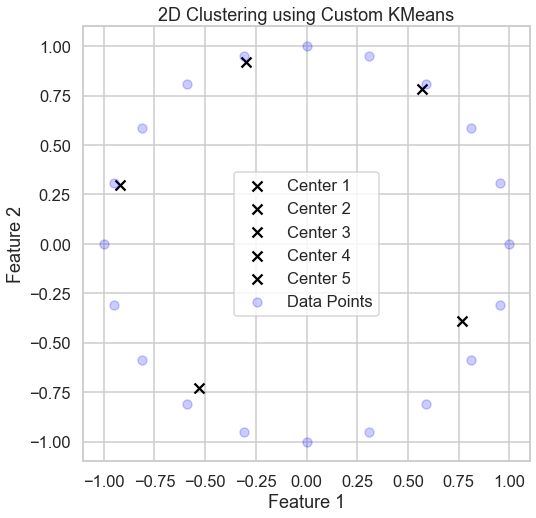

[[1.38876672 1.52870045 0.7553336  1.14681582 0.76230723 1.64432877
  1.60931748]
 [1.5272123  1.47578031 0.54863069 1.38426515 0.87290604 1.64648724
  1.56326106]
 [1.62970769 1.39030866 0.37916254 1.58765194 0.98984507 1.60995197
  1.48117922]
 [1.69343113 1.2751456  0.33797273 1.75196031 1.10148749 1.53575343
  1.36553441]
 [1.71666367 1.13449966 0.46397314 1.87314057 1.19981434 1.42602503
  1.2199948 ]
 [1.69878414 0.97437791 0.66106711 1.94820682 1.27925083 1.28404992
  1.04968364]
 [1.64027036 0.80375303 0.87048044 1.97530968 1.33595761 1.11441118
  0.86189782]
 [1.54269803 0.63765793 1.07053983 1.95378146 1.36745673 0.92344956
  0.66829778]
 [1.4087439  0.50459256 1.25058241 1.88415251 1.37244768 0.72070638
  0.49203309]
 [1.24222129 0.45267563 1.40375625 1.76813825 1.35072883 0.52394449
  0.38640931]
 [1.04823283 0.51222765 1.52511732 1.60859721 1.30318629 0.37687137
  0.42113071]
 [0.83371917 0.64913382 1.61106054 1.40946143 1.23184491 0.36732671
  0.56874307]
 [0.60952269 0.8

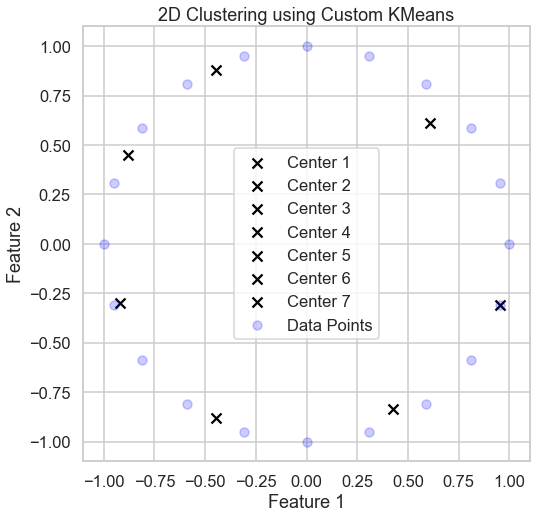

[[0.28728636 1.76820974 1.65851503 1.76883497 1.32987251 0.89909626
  1.8502027  0.8226893 ]
 [0.58319287 1.76433989 1.8260659  1.57424589 1.36014515 0.77633165
  1.82488454 1.09360331]
 [0.8663501  1.71776359 1.94869298 1.34110414 1.36430473 0.67207566
  1.75494474 1.33763279]
 [1.1285839  1.62969043 2.02336956 1.07528625 1.3421808  0.6083914
  1.64214513 1.54874848]
 [1.36320313 1.50242861 2.0482533  0.78368708 1.29468984 0.60500933
  1.48934268 1.72174356]
 [1.56435264 1.33937746 2.02273042 0.47476014 1.22388849 0.66315607
  1.30045103 1.85235422]
 [1.72704589 1.14506266 1.94743047 0.16730539 1.13311434 0.76429118
  1.08042482 1.93736227]
 [1.84726025 0.92534184 1.82421117 0.20315178 1.02727816 0.88600222
  0.8353771  1.97467343]
 [1.92202695 0.6882797  1.65611388 0.51374697 0.913423   1.011282
  0.57335726 1.96336857]
 [1.94950065 0.4483607  1.44729157 0.82109133 0.80168609 1.12869312
  0.31000061 1.90372617]
 [1.92900342 0.25464987 1.20291403 1.10989959 0.70649601 1.23051851
  0.1

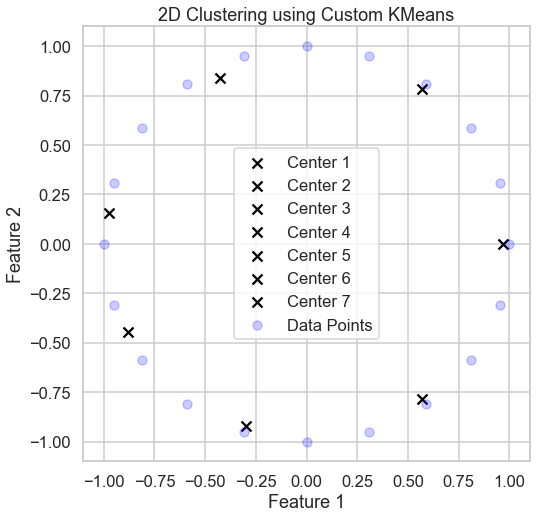

[[1.62072052 0.53792758 1.25633541 1.49754784 1.67944193 0.53307294
  1.20025993 2.0016405  1.64753264]
 [1.7416441  0.76714672 1.0762462  1.61394543 1.47353867 0.50966149
  1.31954419 1.99832307 1.67056996]
 [1.82002191 0.99026737 0.87580245 1.69187205 1.23145479 0.57586621
  1.41229118 1.94580078 1.65408039]
 [1.85388134 1.19470885 0.66547098 1.72923866 0.95922838 0.7019495
  1.47510366 1.84536696 1.59851934]
 [1.84237245 1.37291198 0.46637303 1.72505431 0.66378221 0.85282927
  1.50583432 1.69949471 1.50543691]
 [1.78578399 1.51937971 0.33622176 1.67942965 0.35338662 1.00618741
  1.50346861 1.51177606 1.37749501]
 [1.6855379  1.62995209 0.37376542 1.59357638 0.06205053 1.14896127
  1.46808387 1.28683363 1.21853438]
 [1.5441633  1.70161323 0.54301116 1.46980397 0.29892936 1.27290798
  1.40085217 1.030207   1.0337967 ]
 [1.36525684 1.732448   0.75055877 1.31153077 0.61076788 1.37243482
  1.30408905 0.74821711 0.83063291]
 [1.15345021 1.72163997 0.95856779 1.12336299 0.90946015 1.443671

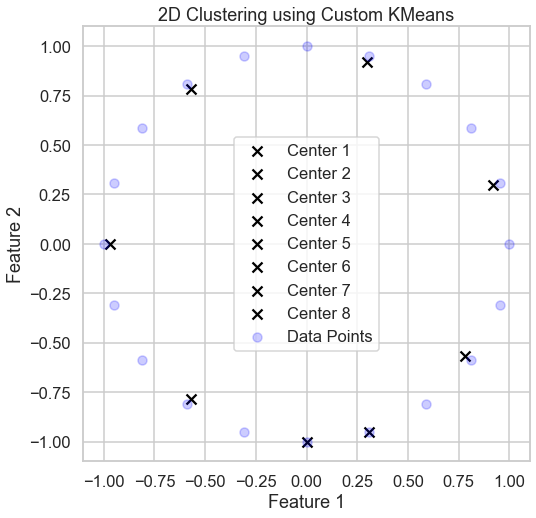

[[1.06109701 0.45827412 1.13589253 1.66657983 1.63646677 0.38854926
  0.85811754 0.740977   0.95259472 0.98977093]
 [0.91056484 0.75169099 1.14861446 1.70146936 1.76432999 0.35048957
  1.14138079 0.55611034 0.64812982 1.16427504]
 [0.75686641 1.0268625  1.14862128 1.69574185 1.84894192 0.47204118
  1.39689766 0.41713906 0.33556281 1.3164309 ]
 [0.61819801 1.2768439  1.13591254 1.64955155 1.88819349 0.66417136
  1.61820821 0.39563284 0.12298126 1.44050705]
 [0.52512787 1.49543274 1.11133099 1.56414933 1.88110785 0.86969897
  1.79979354 0.50845922 0.37037827 1.53240428]
 [0.51384274 1.67722819 1.07657605 1.44188581 1.82786126 1.06664046
  1.93714882 0.68559194 0.68324356 1.58929365]
 [0.59003538 1.81774517 1.03422384 1.28623917 1.72977933 1.24411878
  2.02687442 0.87768917 0.98578997 1.60948779]
 [0.72100514 1.91351922 0.98773288 1.10193367 1.58930886 1.39519208
  2.06675201 1.0630339  1.26595077 1.59239745]
 [0.87312457 1.96218974 0.94138702 0.89535454 1.40996929 1.514886
  2.05579621 1

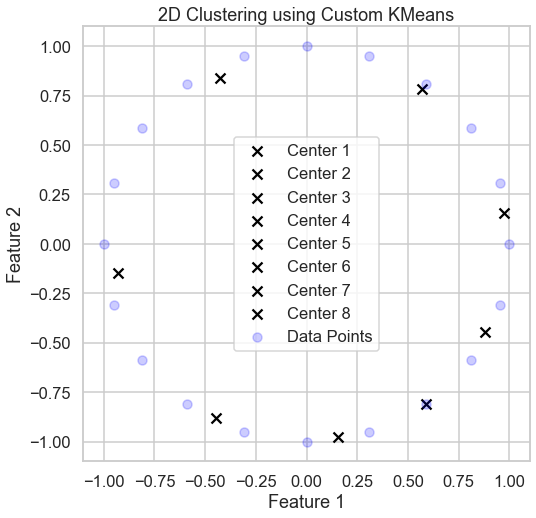

In [53]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
for num_clusters in range(2, 11):


    # Generate random cluster centroids within the range of data points
    # For example, random centroids within the range [-1, 1] for both x and y coordinates
    Cluster_Centroids = np.random.uniform(low=-1, high=1, size=(num_clusters, 2))

    km1=GUC_Kmean2(Cluster_Centroids,X1,"Euclidean")
    display_clusters_2d(X1,km1)
    

[[0.85692541 1.83828254]
 [0.66146707 1.90842855]
 [0.48383503 1.9316449 ]
 [0.37935269 1.90735766]
 [0.41928902 1.83616723]
 [0.57154064 1.71983423]
 [0.76269782 1.56123867]
 [0.95707108 1.36431526]
 [1.13875747 1.13397234]
 [1.29876281 0.87601822]
 [1.4310333  0.59720436]
 [1.53122133 0.30632696]
 [1.596271   0.06843782]
 [1.62427491 0.31292571]
 [1.61442689 0.60367676]
 [1.56700949 0.88210314]
 [1.48339795 1.13950409]
 [1.36608653 1.36915289]
 [1.21877351 1.56526116]
 [1.04661006 1.72294162]]
[[1.64368609 2.13862174 0.96073113]
 [1.5178135  2.25805963 1.10731103]
 [1.35565993 2.32322084 1.23725892]
 [1.161672   2.33239079 1.34432016]
 [0.94157481 2.2853292  1.42416438]
 [0.70311553 2.18327182 1.47387734]
 [0.4596708  2.02892271 1.49174555]
 [0.2550486  1.82645155 1.47716901]
 [0.2644708  1.58154361 1.43063659]
 [0.4748717  1.30165016 1.35374589]
 [0.7186777  0.99697419 1.24928214]
 [0.95626552 0.68470954 1.12141538]
 [1.17489903 0.41268075 0.97616624]
 [1.36701125 0.35723056 0.82250

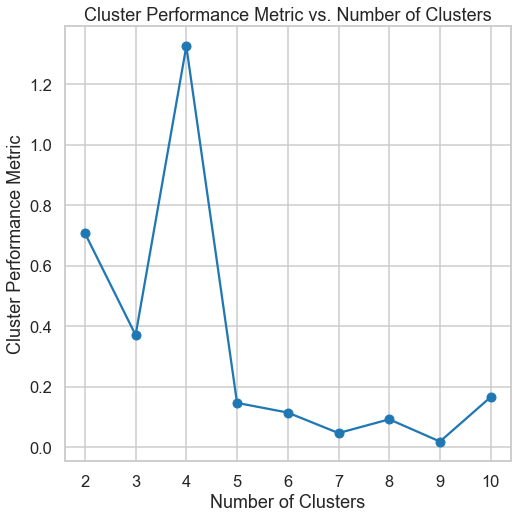

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Function to calculate the GUC_Kmean and return the cluster performance metric
def calculate_cluster_metric(num_clusters, data):
    # Generate random cluster centroids within the range of data points
    centroids = np.random.uniform(low=-1, high=1, size=(num_clusters, 2))
    
    # Apply GUC_Kmean function
    # (Assuming GUC_Kmean returns centroids and cluster_metric)
    centroids, cluster_metric = GUC_Kmean2(centroids, data, "Euclidean")
    
    return cluster_metric

# Prepare the figure size and background
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_style("whitegrid")
sns.set_context("talk")

# Produce a data set (X1) representing the x and y coordinates of a circle
angle = np.linspace(0, 2*np.pi, 20, endpoint=False)
X1 = np.append([np.cos(angle)], [np.sin(angle)], axis=0).T

# Range of number of clusters
num_clusters_range = range(2, 11)

# Collect cluster performance metrics for each number of clusters
cluster_metrics = [calculate_cluster_metric(num_clusters, X1) for num_clusters in num_clusters_range]

# Plot the Cluster Performance Metric versus the number of clusters
plt.plot(num_clusters_range, cluster_metrics, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Performance Metric')
plt.title('Cluster Performance Metric vs. Number of Clusters')
plt.show()


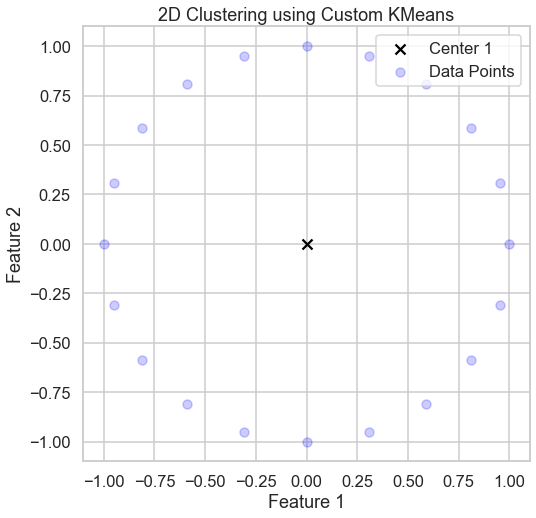

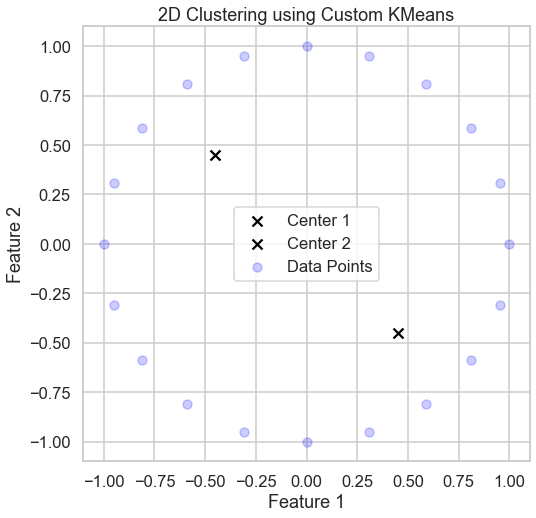

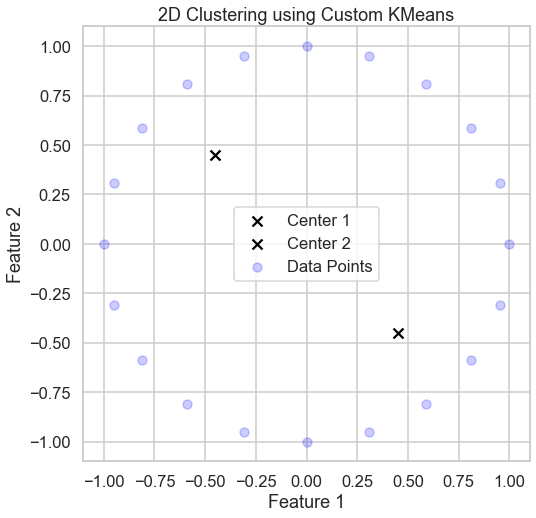

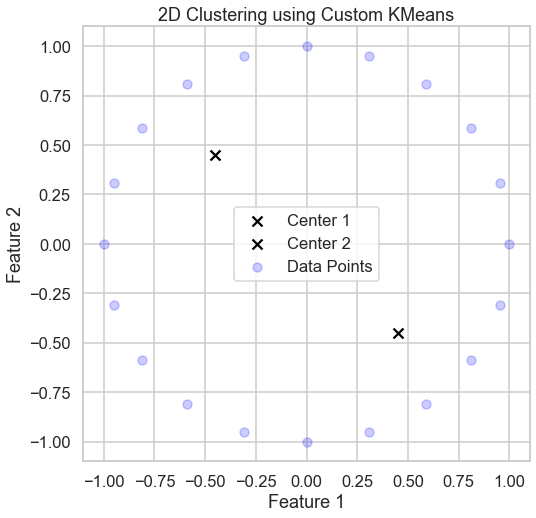

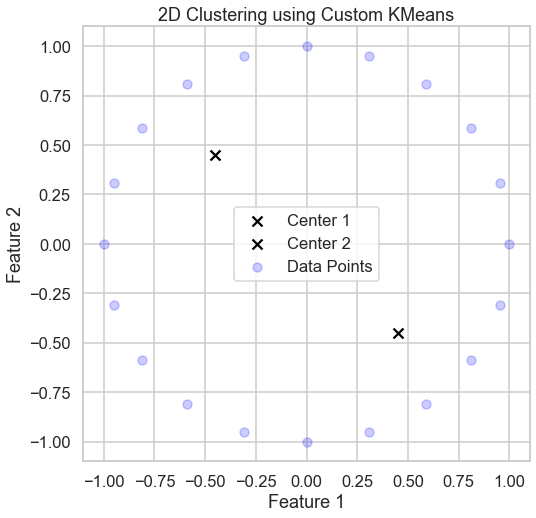

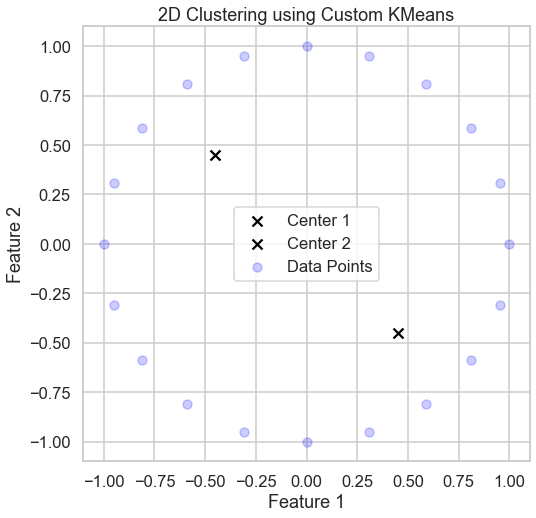

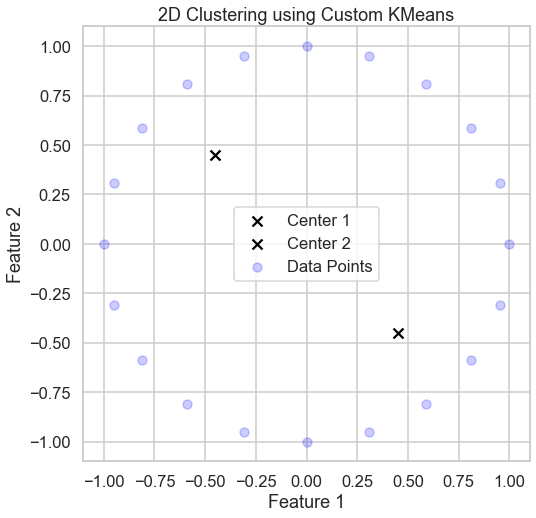

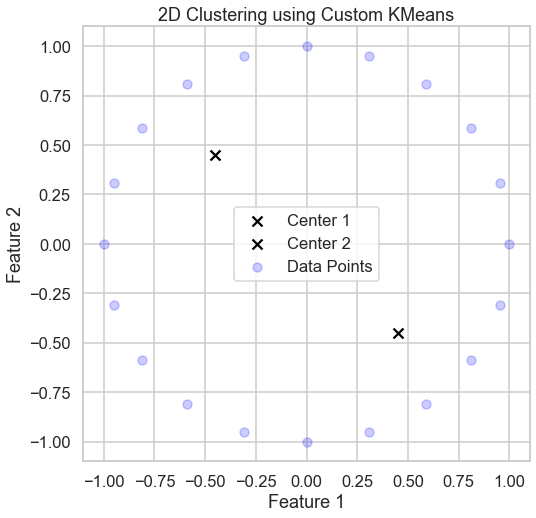

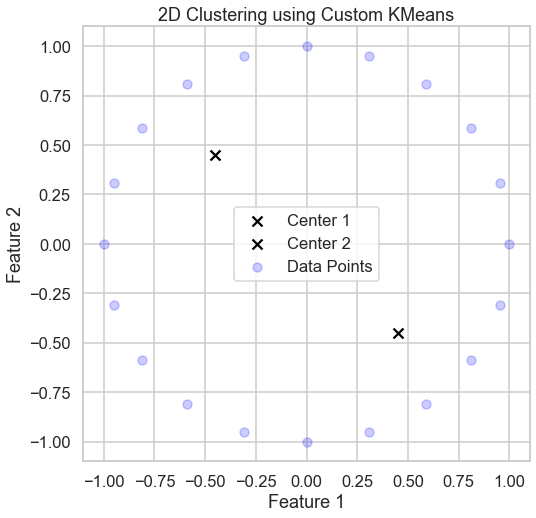

In [55]:
for num_clusters in range(2, 11):


    # Generate random cluster centroids within the range of data points
    # For example, random centroids within the range [-1, 1] for both x and y coordinates
    Cluster_Centroids = np.random.uniform(low=-1, high=1, size=(num_clusters, 2))

    km11=GUC_Kmean2(Cluster_Centroids,X1,"Pearson")
    display_clusters_2d(X1,km11)


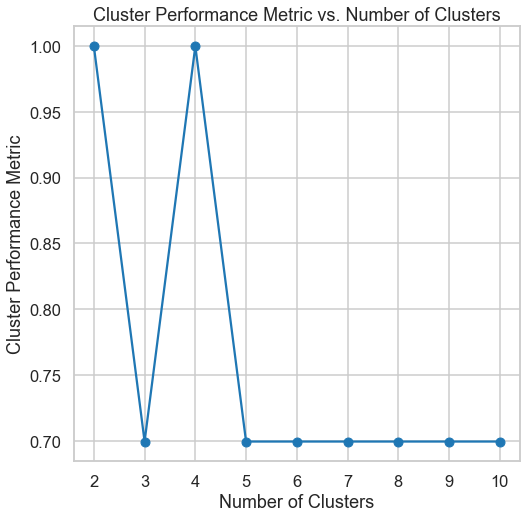

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Function to calculate the GUC_Kmean and return the cluster performance metric
def calculate_cluster_metric(num_clusters, data):
    # Generate random cluster centroids within the range of data points
    centroids = np.random.uniform(low=-1, high=1, size=(num_clusters, 2))
    
    # Apply GUC_Kmean function
    # (Assuming GUC_Kmean returns centroids and cluster_metric)
    centroids, cluster_metric = GUC_Kmean2(centroids, data, "Pearson")
    
    return cluster_metric

# Prepare the figure size and background
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_style("whitegrid")
sns.set_context("talk")

# Produce a data set (X1) representing the x and y coordinates of a circle
angle = np.linspace(0, 2*np.pi, 20, endpoint=False)
X1 = np.append([np.cos(angle)], [np.sin(angle)], axis=0).T

# Range of number of clusters
num_clusters_range = range(2, 11)

# Collect cluster performance metrics for each number of clusters
cluster_metrics = [calculate_cluster_metric(num_clusters, X1) for num_clusters in num_clusters_range]

# Plot the Cluster Performance Metric versus the number of clusters
plt.plot(num_clusters_range, cluster_metrics, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Performance Metric')
plt.title('Cluster Performance Metric vs. Number of Clusters')
plt.show()


[[ 0.51559865  4.01436706  8.24405505 12.48253759 16.72312906]
 [ 1.65502882  2.77755468  6.97785781 11.21009319 15.44803803]
 [ 0.33113127  4.57377196  8.81641264 13.05905333 17.30169402]
 ...
 [17.98296694 13.74254377  9.5041001   5.27241198  1.12638243]
 [16.33942791 12.10071402  7.86623514  3.65075757  0.88227336]
 [16.33371361 12.09289121  7.85403307  3.62403824  0.76254232]]
17.52100214253117


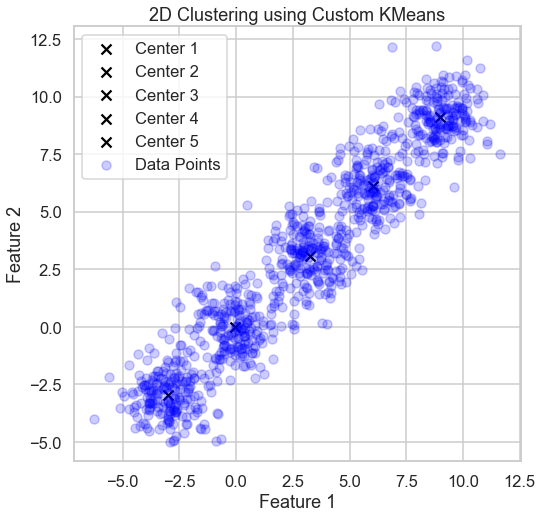

[[ 0.51559865  4.01436706  8.24405505 12.48253759 16.72312906]
 [ 1.65502882  2.77755468  6.97785781 11.21009319 15.44803803]
 [ 0.33113127  4.57377196  8.81641264 13.05905333 17.30169402]
 ...
 [17.98296694 13.74254377  9.5041001   5.27241198  1.12638243]
 [16.33942791 12.10071402  7.86623514  3.65075757  0.88227336]
 [16.33371361 12.09289121  7.85403307  3.62403824  0.76254232]]
17.52100214253117


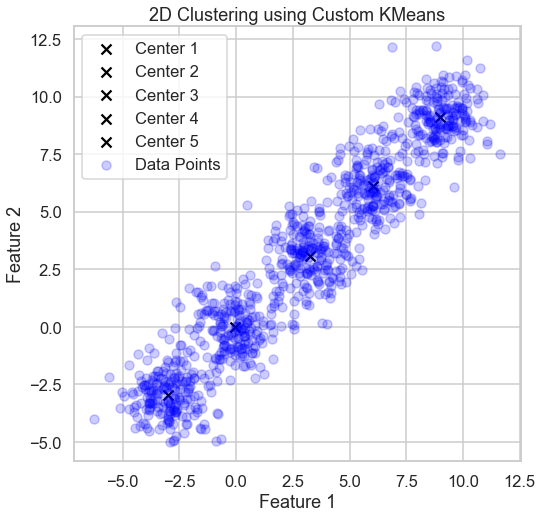

[[ 0.51559865  4.01436706  8.24405505 12.48253759 16.72312906]
 [ 1.65502882  2.77755468  6.97785781 11.21009319 15.44803803]
 [ 0.33113127  4.57377196  8.81641264 13.05905333 17.30169402]
 ...
 [17.98296694 13.74254377  9.5041001   5.27241198  1.12638243]
 [16.33942791 12.10071402  7.86623514  3.65075757  0.88227336]
 [16.33371361 12.09289121  7.85403307  3.62403824  0.76254232]]
17.52100214253117


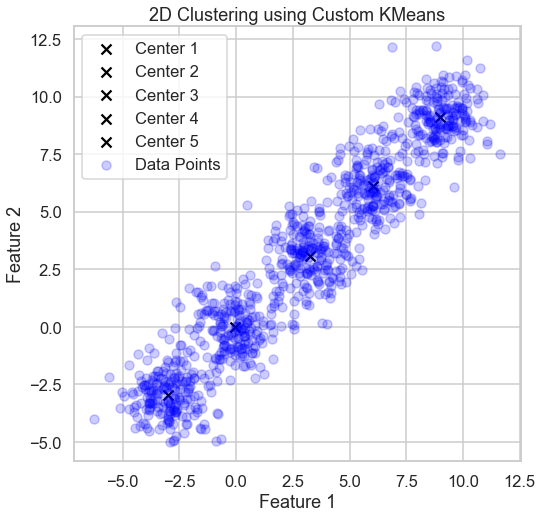

[[ 0.51559865  4.01436706  8.24405505 12.48253759 16.72312906]
 [ 1.65502882  2.77755468  6.97785781 11.21009319 15.44803803]
 [ 0.33113127  4.57377196  8.81641264 13.05905333 17.30169402]
 ...
 [17.98296694 13.74254377  9.5041001   5.27241198  1.12638243]
 [16.33942791 12.10071402  7.86623514  3.65075757  0.88227336]
 [16.33371361 12.09289121  7.85403307  3.62403824  0.76254232]]
17.52100214253117


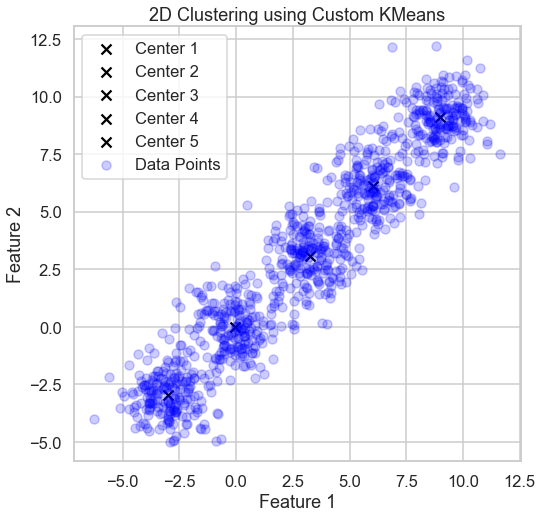

[[ 0.51559865  4.01436706  8.24405505 12.48253759 16.72312906]
 [ 1.65502882  2.77755468  6.97785781 11.21009319 15.44803803]
 [ 0.33113127  4.57377196  8.81641264 13.05905333 17.30169402]
 ...
 [17.98296694 13.74254377  9.5041001   5.27241198  1.12638243]
 [16.33942791 12.10071402  7.86623514  3.65075757  0.88227336]
 [16.33371361 12.09289121  7.85403307  3.62403824  0.76254232]]
17.52100214253117


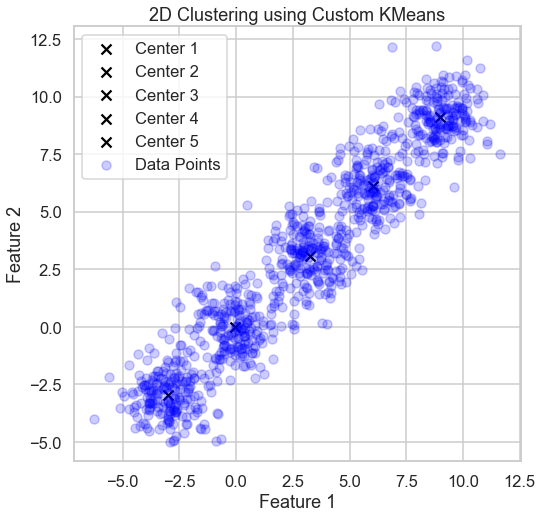

[[ 0.51559865  4.01436706  8.24405505 12.48253759 16.72312906]
 [ 1.65502882  2.77755468  6.97785781 11.21009319 15.44803803]
 [ 0.33113127  4.57377196  8.81641264 13.05905333 17.30169402]
 ...
 [17.98296694 13.74254377  9.5041001   5.27241198  1.12638243]
 [16.33942791 12.10071402  7.86623514  3.65075757  0.88227336]
 [16.33371361 12.09289121  7.85403307  3.62403824  0.76254232]]
17.52100214253117


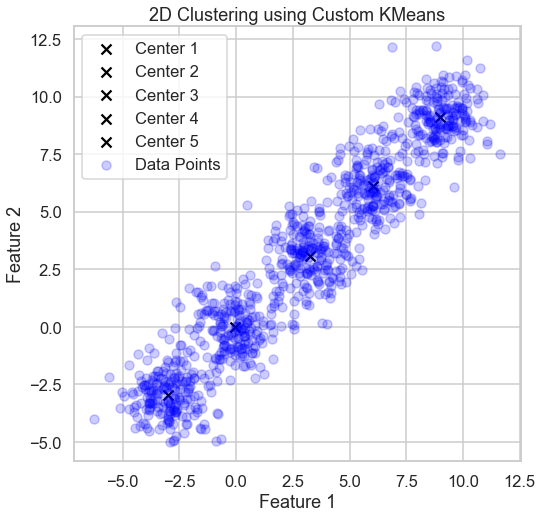

[[ 0.51559865  4.01436706  8.24405505 12.48253759 16.72312906]
 [ 1.65502882  2.77755468  6.97785781 11.21009319 15.44803803]
 [ 0.33113127  4.57377196  8.81641264 13.05905333 17.30169402]
 ...
 [17.98296694 13.74254377  9.5041001   5.27241198  1.12638243]
 [16.33942791 12.10071402  7.86623514  3.65075757  0.88227336]
 [16.33371361 12.09289121  7.85403307  3.62403824  0.76254232]]
17.52100214253117


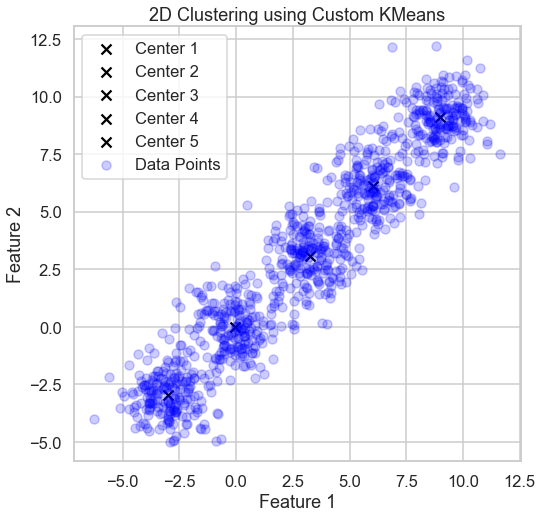

[[ 0.51559865  4.01436706  8.24405505 12.48253759 16.72312906]
 [ 1.65502882  2.77755468  6.97785781 11.21009319 15.44803803]
 [ 0.33113127  4.57377196  8.81641264 13.05905333 17.30169402]
 ...
 [17.98296694 13.74254377  9.5041001   5.27241198  1.12638243]
 [16.33942791 12.10071402  7.86623514  3.65075757  0.88227336]
 [16.33371361 12.09289121  7.85403307  3.62403824  0.76254232]]
17.52100214253117


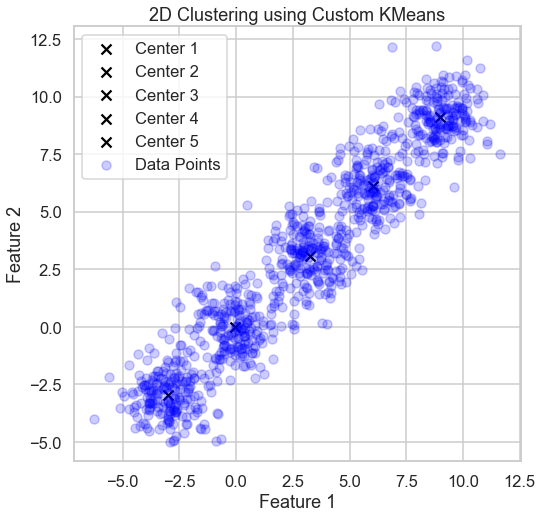

[[ 0.51559865  4.01436706  8.24405505 12.48253759 16.72312906]
 [ 1.65502882  2.77755468  6.97785781 11.21009319 15.44803803]
 [ 0.33113127  4.57377196  8.81641264 13.05905333 17.30169402]
 ...
 [17.98296694 13.74254377  9.5041001   5.27241198  1.12638243]
 [16.33942791 12.10071402  7.86623514  3.65075757  0.88227336]
 [16.33371361 12.09289121  7.85403307  3.62403824  0.76254232]]
17.52100214253117


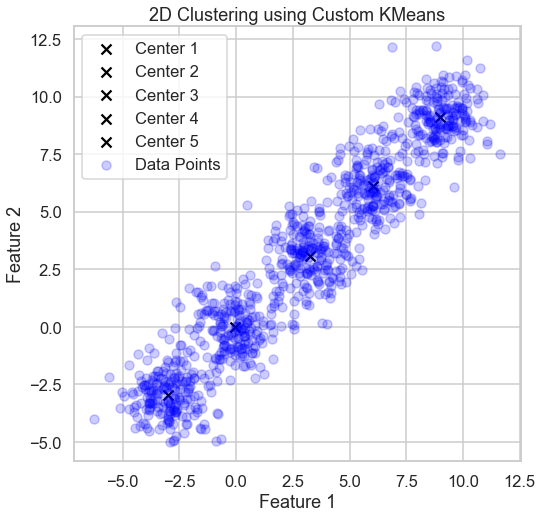

In [57]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X2, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
for num_clusters in range(2, 11):


    # Generate random cluster centroids within the range of data points
    # For example, random centroids within the range [-1, 1] for both x and y coordinates
    Cluster_Centroids = np.random.uniform(low=-1, high=1, size=(num_clusters, 2))

    
    km2=GUC_Kmean(centers,X2,"Euclidean")
    display_clusters_2d(X2,km2)



[[ 4.49324451  3.58516111]
 [ 3.22133799  2.58762475]
 [ 5.04557764  4.20580145]
 ...
 [13.26865568 14.17950005]
 [11.63582043 12.49149096]
 [11.6260759  12.49264283]]
[[ 4.55740064  3.73713058  4.0566796 ]
 [ 3.11202479  2.43084605  2.67361026]
 [ 5.03435527  4.2679954   4.55996342]
 ...
 [13.33553118 14.04732835 13.77139198]
 [11.76665363 12.42358261 12.17142634]
 [11.74581675 12.41265888 12.15615852]]
[[ 4.09027462  3.28075873  4.46819807  4.27903594]
 [ 3.01506449  2.01840262  3.09952079  3.02284746]
 [ 4.6990739   3.81958024  4.98158744  4.83484766]
 ...
 [13.66772048 14.4943878  13.34596917 13.48015062]
 [11.98526933 12.86088649 11.74590901 11.84279492]
 [11.98507321 12.85195334 11.73039447 11.83400143]]
[[ 3.95776601  4.60908581  3.96444934  3.29242172  3.18079952]
 [ 2.70971379  3.42244401  3.08177641  2.0340449   2.05590919]
 [ 4.51260459  5.19145741  4.61630088  3.83284134  3.75997106]
 ...
 [13.80251867 13.13907367 13.86718916 14.48114551 14.56874049]
 [12.16382865 11.478928

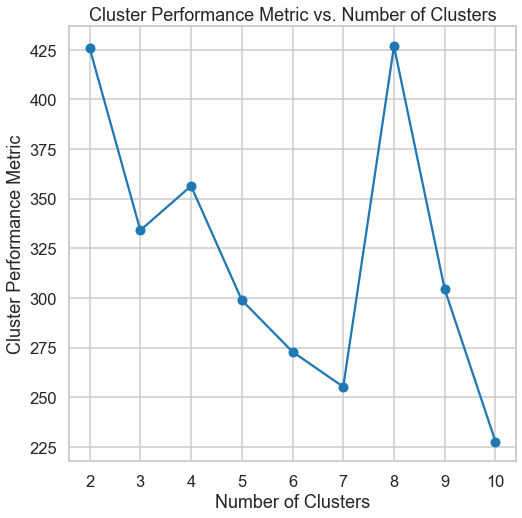

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Function to calculate the GUC_Kmean and return the cluster performance metric
def calculate_cluster_metric(num_clusters, data):
    # Generate random cluster centroids within the range of data points
    centroids = np.random.uniform(low=-1, high=1, size=(num_clusters, 2))
    
    # Apply GUC_Kmean function
    # (Assuming GUC_Kmean returns centroids and cluster_metric)
    centroids, cluster_metric = GUC_Kmean2(centroids, data, "Euclidean")
    
    return cluster_metric

# Prepare the figure size and background
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_style("whitegrid")
sns.set_context("talk")

# Produce a data set (X1) representing the x and y coordinates of a circle
angle = np.linspace(0, 2*np.pi, 20, endpoint=False)
X1 = np.append([np.cos(angle)], [np.sin(angle)], axis=0).T

# Range of number of clusters
num_clusters_range = range(2, 11)

# Collect cluster performance metrics for each number of clusters
cluster_metrics = [calculate_cluster_metric(num_clusters, X2) for num_clusters in num_clusters_range]

# Plot the Cluster Performance Metric versus the number of clusters
plt.plot(num_clusters_range, cluster_metrics, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Performance Metric')
plt.title('Cluster Performance Metric vs. Number of Clusters')
plt.show()


C:\Users\yomna\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


1471.5180623314704


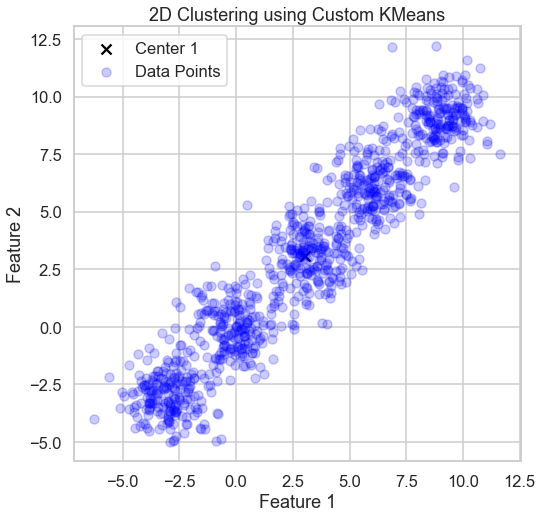

1471.5180623314704


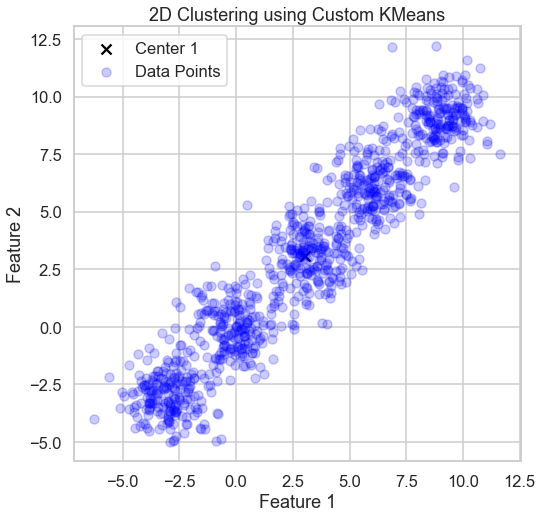

1471.5180623314704


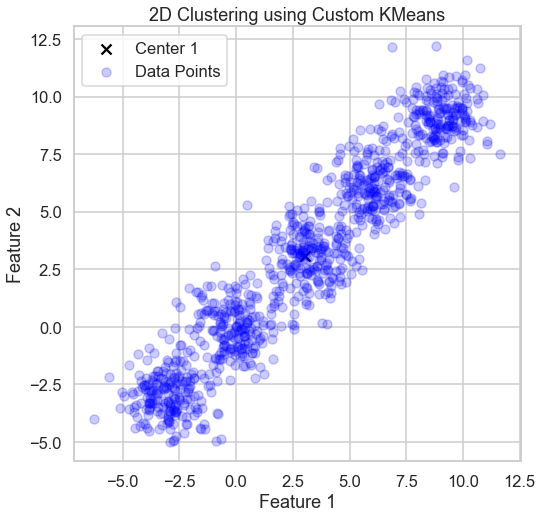

1471.5180623314704


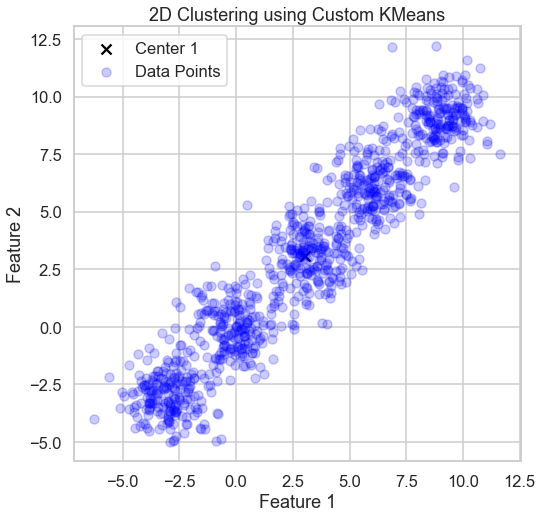

1471.5180623314704


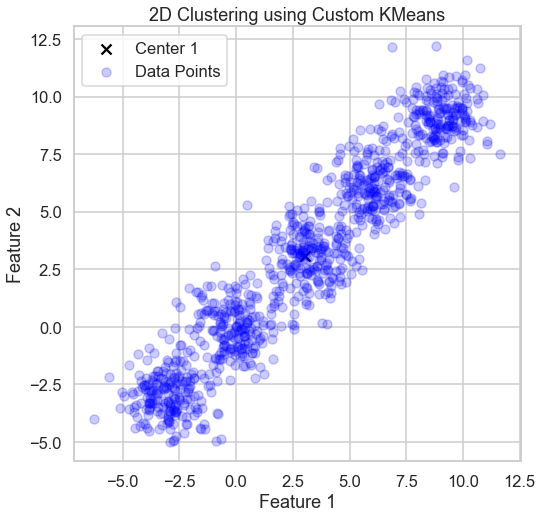

1471.5180623314704


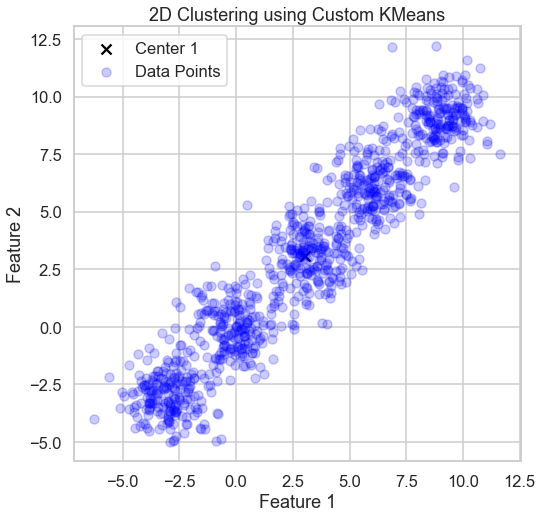

1471.5180623314704


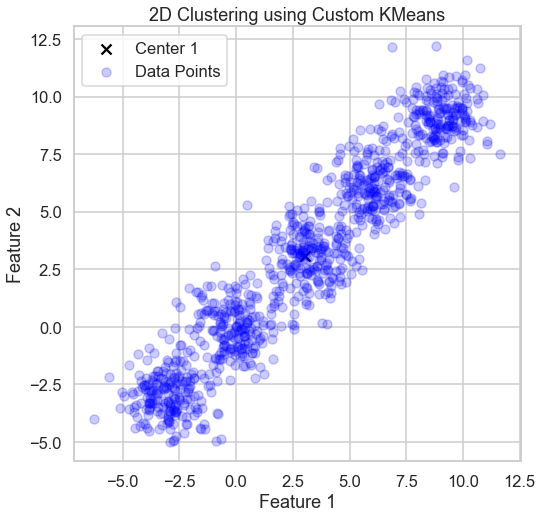

1471.5180623314704


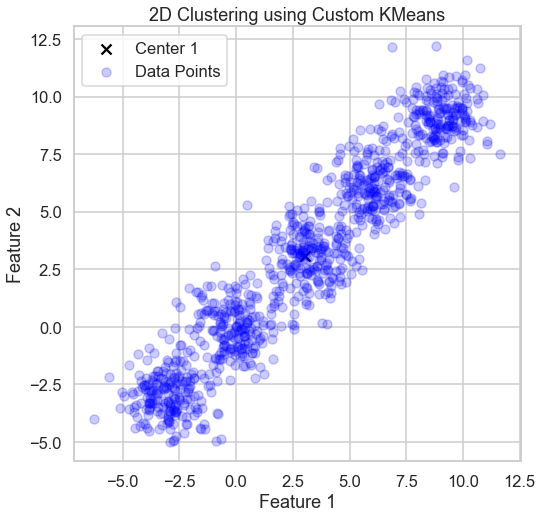

1471.5180623314704


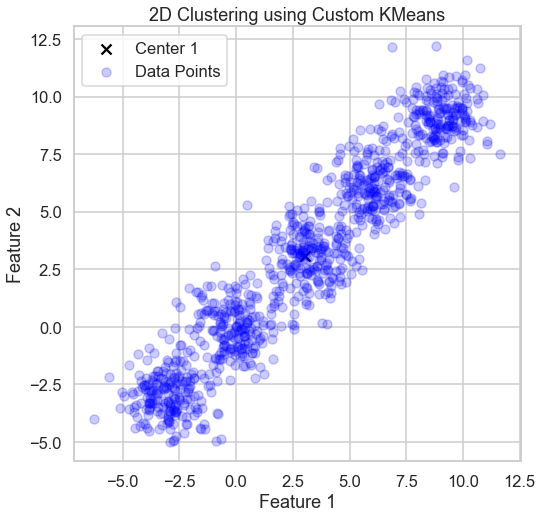

In [59]:
for num_clusters in range(2, 11):


    # Generate random cluster centroids within the range of data points
    # For example, random centroids within the range [-1, 1] for both x and y coordinates
    Cluster_Centroids = np.random.uniform(low=-1, high=1, size=(num_clusters, 2))

    
    km2=GUC_Kmean(centers,X2,"Pearson")
    display_clusters_2d(X2,km2)


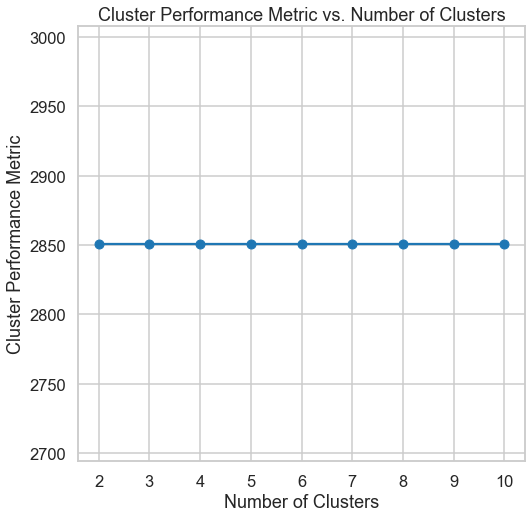

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Function to calculate the GUC_Kmean and return the cluster performance metric
def calculate_cluster_metric(num_clusters, data):
    # Generate random cluster centroids within the range of data points
    centroids = np.random.uniform(low=-1, high=1, size=(num_clusters, 2))
    
    # Apply GUC_Kmean function
    # (Assuming GUC_Kmean returns centroids and cluster_metric)
    centroids, cluster_metric = GUC_Kmean2(centroids, data, "Pearson")
    
    return cluster_metric

# Prepare the figure size and background
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_style("whitegrid")
sns.set_context("talk")

# Produce a data set (X1) representing the x and y coordinates of a circle
angle = np.linspace(0, 2*np.pi, 20, endpoint=False)
X1 = np.append([np.cos(angle)], [np.sin(angle)], axis=0).T

# Range of number of clusters
num_clusters_range = range(2, 11)

# Collect cluster performance metrics for each number of clusters
cluster_metrics = [calculate_cluster_metric(num_clusters, X2) for num_clusters in num_clusters_range]

# Plot the Cluster Performance Metric versus the number of clusters
plt.plot(num_clusters_range, cluster_metrics, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Performance Metric')
plt.title('Cluster Performance Metric vs. Number of Clusters')
plt.show()


[[1.19008391 1.4151671 ]
 [1.05060695 1.96627721]
 [0.45740331 1.48115557]
 ...
 [1.22954507 1.62370839]
 [0.44800122 1.36469273]
 [1.52869768 0.44545684]]


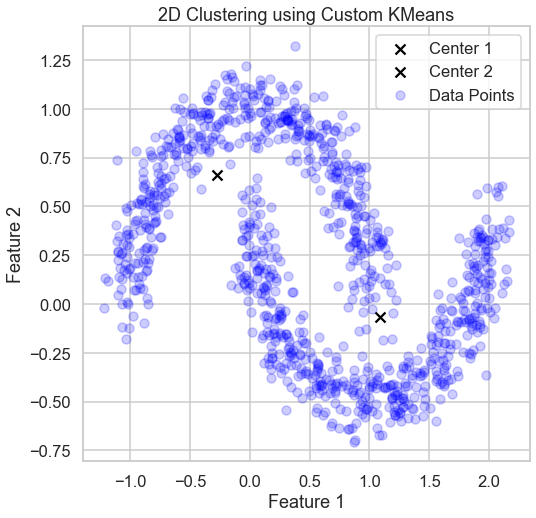

[[1.26204979 0.16536318 0.57971116]
 [0.73678462 1.0725251  1.37752517]
 [0.30787297 1.11760597 1.51774687]
 ...
 [1.20809953 0.3100235  0.62905679]
 [0.43904125 1.0016334  1.40898442]
 [1.94723113 1.44013323 1.65350238]]


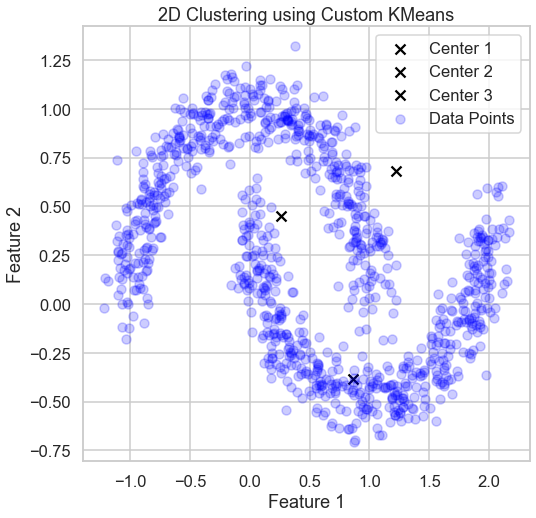

[[1.29378153 1.09700422 0.39241312 1.24421451]
 [1.43731025 1.85449528 1.2308402  2.07204323]
 [0.86050868 1.49453175 1.33573953 1.74923837]
 ...
 [1.41031031 1.33310328 0.46567959 1.48619934]
 [0.79391088 1.35547231 1.2243339  1.60792338]
 [1.16829956 0.3121099  1.54873979 0.32117164]]


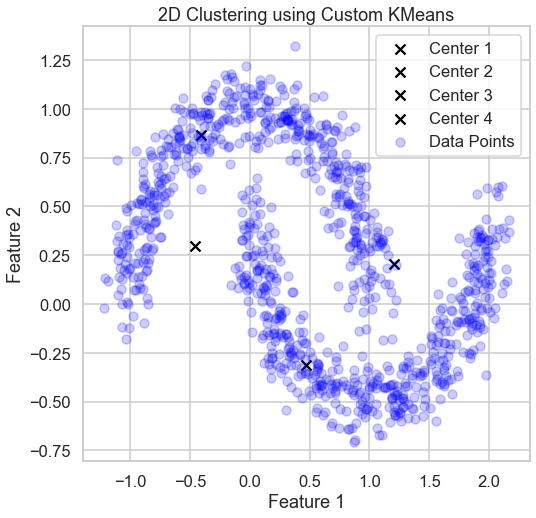

[[1.4552269  1.49582124 1.22153815 1.28109353 0.56660061]
 [2.22317867 1.60771709 1.14187636 1.01948661 1.49236857]
 [1.84226153 1.0200364  0.54894717 0.44287832 1.51027499]
 ...
 [1.69432047 1.61277751 1.27846783 1.29549847 0.72385572]
 [1.70655149 0.96990136 0.52479959 0.48104169 1.38389195]
 [0.12994945 1.23640419 1.46076041 1.68019092 1.35758534]]


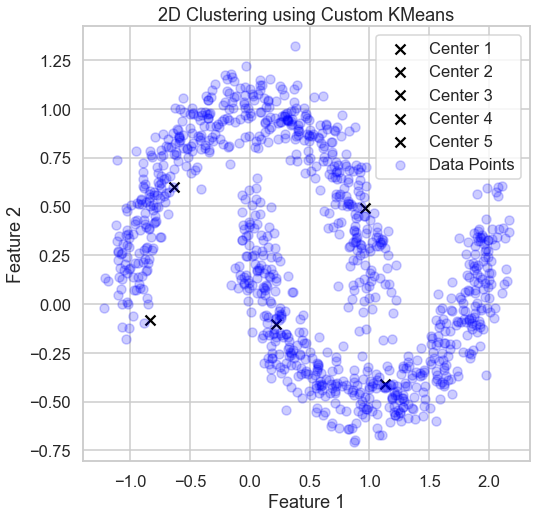

[[1.4524294  0.41879107 0.54983773 1.7323311  1.29591582 1.39356931]
 [1.88534891 1.18721255 1.37642802 1.98363273 0.68971264 1.55689785]
 [1.35921012 1.33508188 1.13959546 1.40651772 0.35509777 0.97811636]
 ...
 [1.6390411  0.43826223 0.78783808 1.88705037 1.22355018 1.51893996]
 [1.25741585 1.2309054  0.99586319 1.33968004 0.49617145 0.9137583 ]
 [0.68684991 1.64078722 0.8595641  1.07916585 2.03845348 1.14351235]]


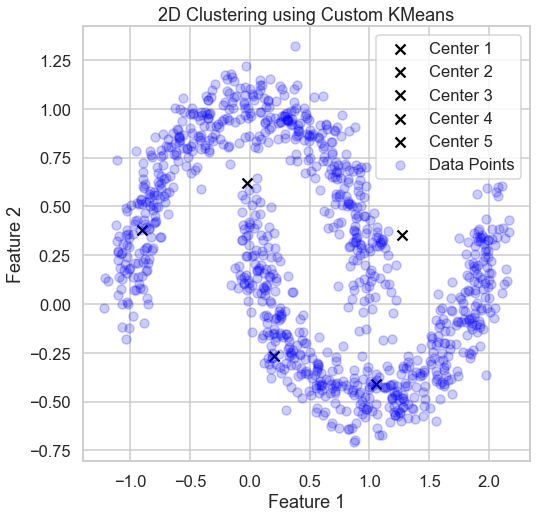

[[0.88250961 1.09258688 0.3129294  ... 0.7081776  0.25263676 1.29649729]
 [1.71613073 1.97289646 1.23929705 ... 0.78021603 0.70486388 0.98765612]
 [1.43140495 1.71083838 1.26429798 ... 0.34998297 0.73598791 0.42446391]
 ...
 [1.12395917 1.33385777 0.47458048 ... 0.747874   0.19518483 1.29986091]
 [1.2877612  1.56698354 1.14223704 ... 0.20664547 0.63492333 0.48023665]
 [0.55852657 0.54348121 1.37787005 ... 1.40717044 1.54635083 1.73597007]]


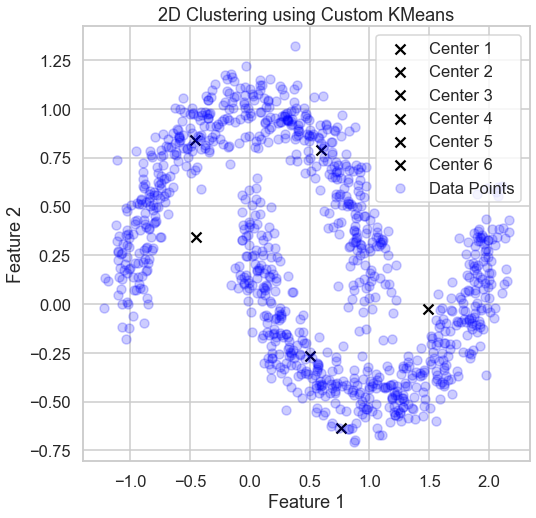

[[0.33128912 1.73486462 0.53388531 ... 1.67241543 0.85339725 0.89070101]
 [1.11967411 1.96606067 0.45378989 ... 1.99223714 0.39501129 0.32344327]
 [1.2487419  1.38606375 0.50159144 ... 1.42864344 0.21078612 0.27069005]
 ...
 [0.35966317 1.88530459 0.42287047 ... 1.84040048 0.76460936 0.78172198]
 [1.14325106 1.32267843 0.43814628 ... 1.34918283 0.25170834 0.32994426]
 [1.59572161 1.11395253 1.70294069 ... 0.93963796 1.82028707 1.89718732]]


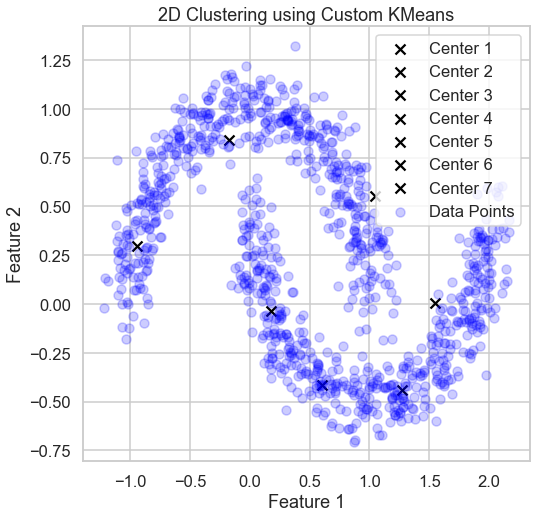

[[0.18148182 1.70199051 0.21273664 ... 0.73084137 1.531561   0.19534168]
 [0.78484577 1.75710251 1.15821596 ... 0.74922984 1.74940446 1.13030196]
 [0.78128511 1.16402293 1.0981432  ... 0.3079248  1.17313649 1.14750007]
 ...
 [0.20857976 1.81203735 0.44783623 ... 0.75788507 1.67400814 0.37453687]
 [0.67047651 1.13241192 0.96809572 ... 0.16446077 1.10548195 1.0266397 ]
 [1.47603023 1.38212072 1.24115955 ... 1.44765188 1.07712421 1.37991714]]


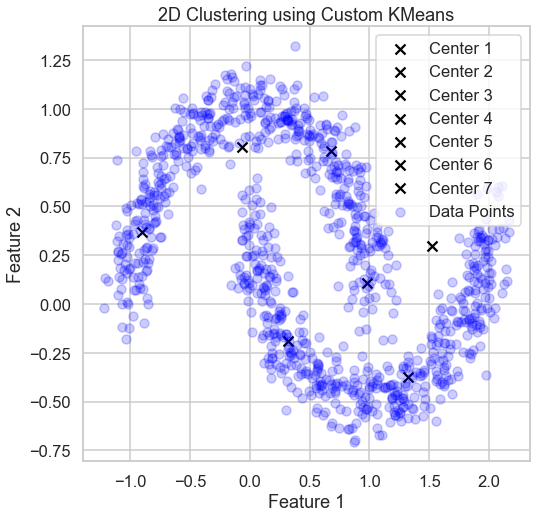

[[1.50362204 1.33680027 0.07205484 ... 0.75094755 1.45061069 1.20892925]
 [2.24894472 2.10909828 0.88607514 ... 1.32620343 1.97424932 0.57053855]
 [1.85070544 1.73876513 0.88461957 ... 0.93686869 1.47689241 0.30303312]
 ...
 [1.74092853 1.57578686 0.21416195 ... 0.94460982 1.65473924 1.12268442]
 [1.71731306 1.6015371  0.76895093 ... 0.79788915 1.36429429 0.44678841]
 [0.11220081 0.13217531 1.4306591  ... 0.81781889 0.50373287 2.03090445]]


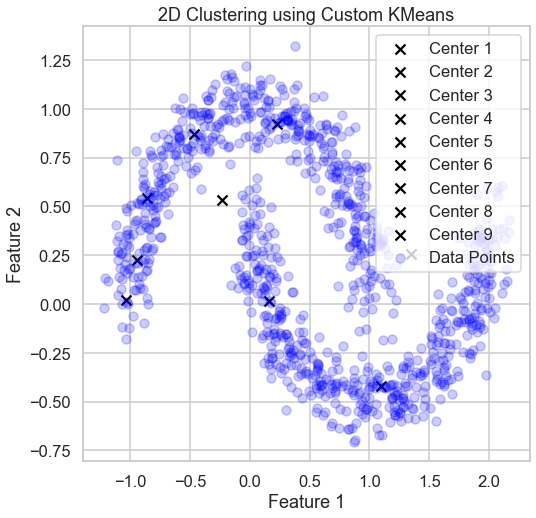

In [61]:
for num_clusters in range(2, 11):


    # Generate random cluster centroids within the range of data points
    # For example, random centroids within the range [-1, 1] for both x and y coordinates
    Cluster_Centroids = np.random.uniform(low=-1, high=1, size=(num_clusters, 2))

    km3=GUC_Kmean2(Cluster_Centroids,X3,"Euclidean")
    display_clusters_2d(X3,km3)
    

[[1.56371541 1.20855112]
 [1.8030438  1.91167603]
 [1.22895224 1.51043549]
 ...
 [1.71184453 1.43883686]
 [1.15889696 1.37631346]
 [1.0484676  0.22968923]]
[[1.69679981 0.83619383 1.17660055]
 [2.40374433 1.33409007 1.81214686]
 [1.9729791  0.90143777 1.38107563]
 ...
 [1.93109073 1.01562288 1.39597924]
 [1.84527648 0.76844102 1.25125258]
 [0.28890916 0.83716527 0.36653054]]
[[1.23593641 1.2495007  0.13244667 0.89834407]
 [0.48230104 1.13986231 0.94558004 1.62908649]
 [0.40691346 0.54665028 1.02614425 1.27714198]
 ...
 [1.12218608 1.30057602 0.18014874 1.12850113]
 [0.54331082 0.53312684 0.91880961 1.13656073]
 [2.14540846 1.49936885 1.52264564 0.52223467]]
[[0.83628672 1.17538913 0.50156522 1.69178304 0.48339971]
 [1.73664908 1.70490654 0.45140854 2.45936212 1.34442346]
 [1.52041798 1.23182207 0.64372624 2.065606   1.43533394]
 ...
 [1.0764574  1.37494706 0.32933117 1.93155835 0.57800779]
 [1.37652619 1.11065564 0.58930573 1.93213508 1.32001398]
 [0.72180636 0.56184684 1.78021546 0.32

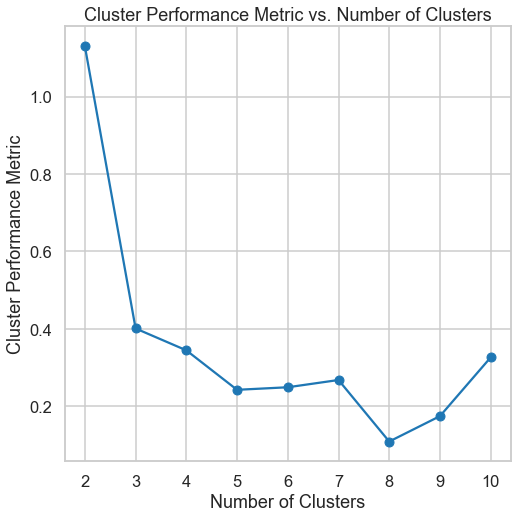

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Function to calculate the GUC_Kmean and return the cluster performance metric
def calculate_cluster_metric(num_clusters, data):
    # Generate random cluster centroids within the range of data points
    centroids = np.random.uniform(low=-1, high=1, size=(num_clusters, 2))
    
    # Apply GUC_Kmean function
    # (Assuming GUC_Kmean returns centroids and cluster_metric)
    centroids, cluster_metric = GUC_Kmean2(centroids, data, "Euclidean")
    
    return cluster_metric

# Prepare the figure size and background
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_style("whitegrid")
sns.set_context("talk")

# Produce a data set (X1) representing the x and y coordinates of a circle
angle = np.linspace(0, 2*np.pi, 20, endpoint=False)
X1 = np.append([np.cos(angle)], [np.sin(angle)], axis=0).T

# Range of number of clusters
num_clusters_range = range(2, 11)

# Collect cluster performance metrics for each number of clusters
cluster_metrics = [calculate_cluster_metric(num_clusters, X3) for num_clusters in num_clusters_range]

# Plot the Cluster Performance Metric versus the number of clusters
plt.plot(num_clusters_range, cluster_metrics, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Performance Metric')
plt.title('Cluster Performance Metric vs. Number of Clusters')
plt.show()


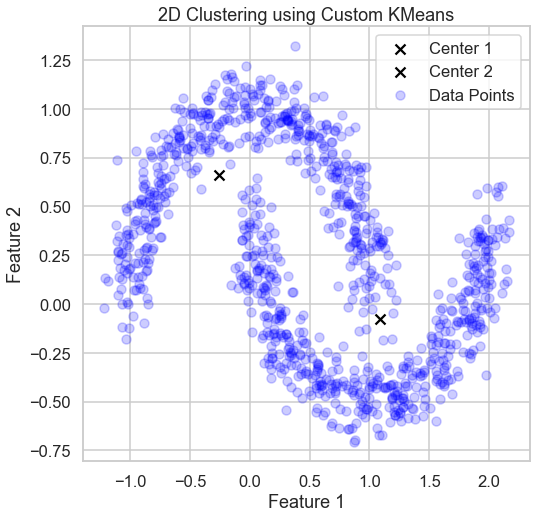

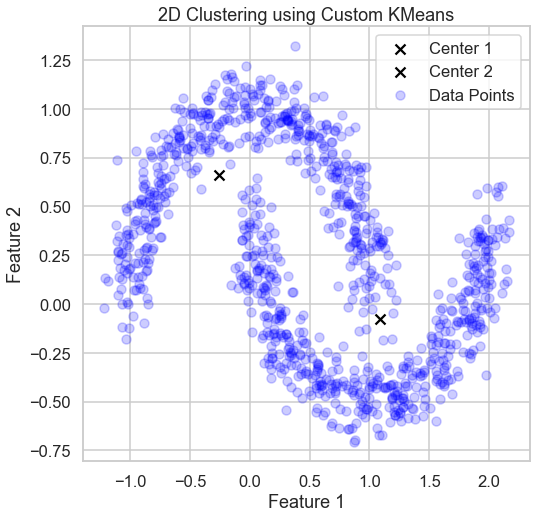

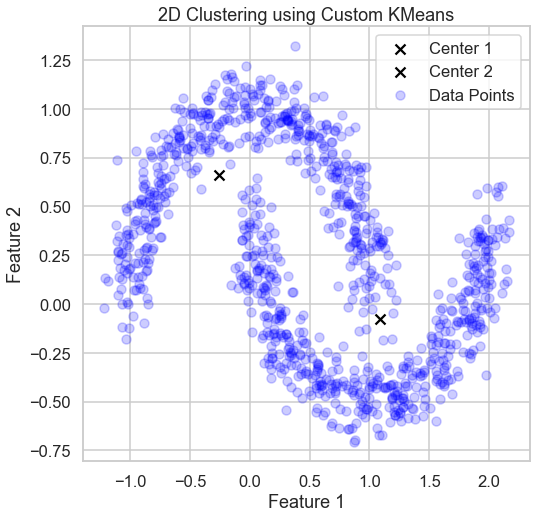

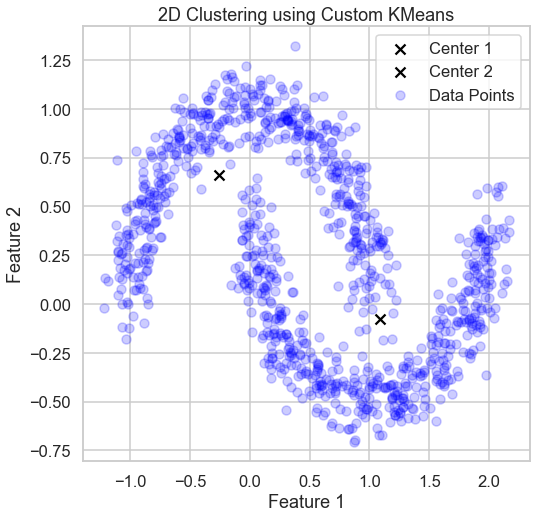

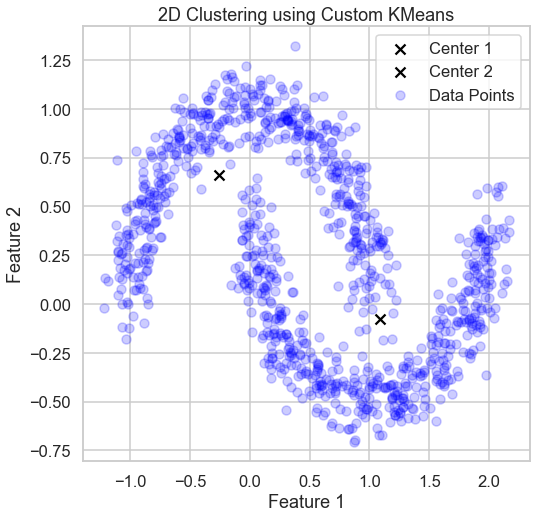

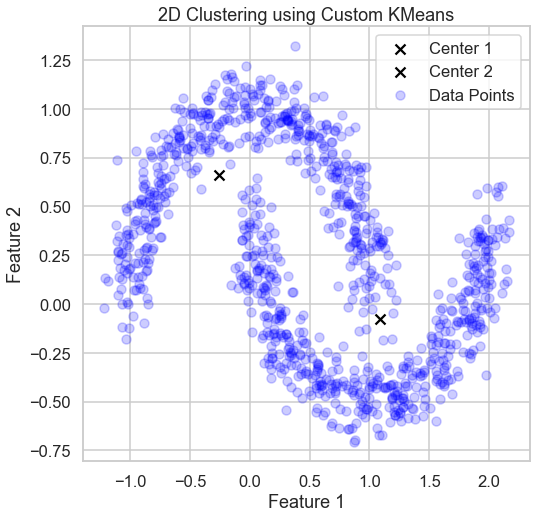

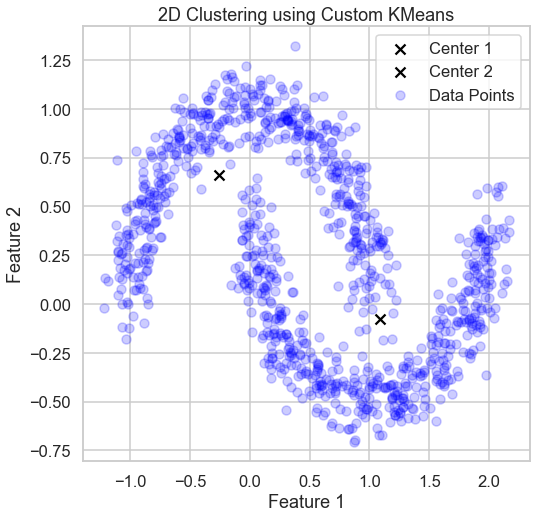

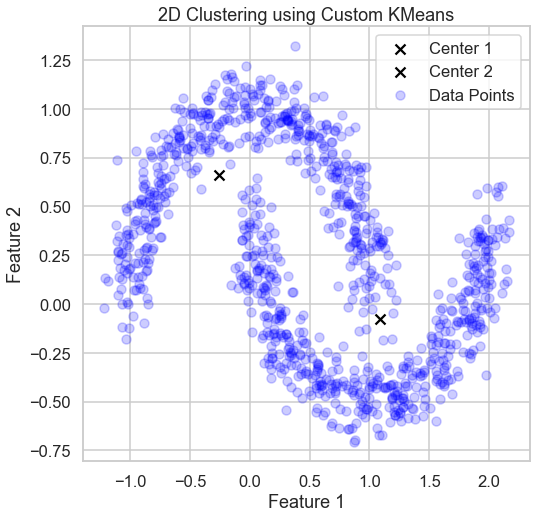

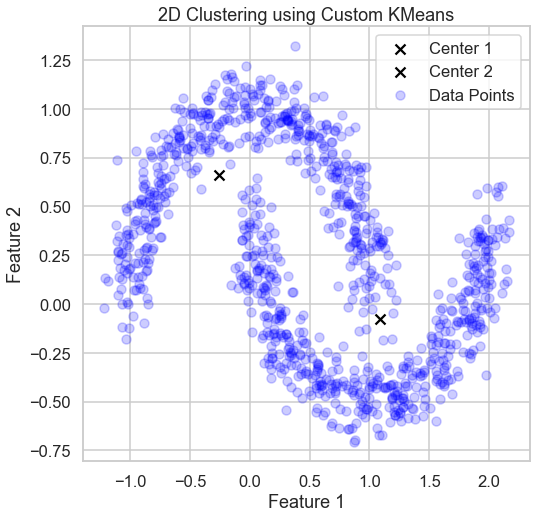

In [63]:
for num_clusters in range(2, 11):


    # Generate random cluster centroids within the range of data points
    # For example, random centroids within the range [-1, 1] for both x and y coordinates
    Cluster_Centroids = np.random.uniform(low=-1, high=1, size=(num_clusters, 2))

    km3=GUC_Kmean2(Cluster_Centroids,X3,"Pearson")
    display_clusters_2d(X3,km3)
    

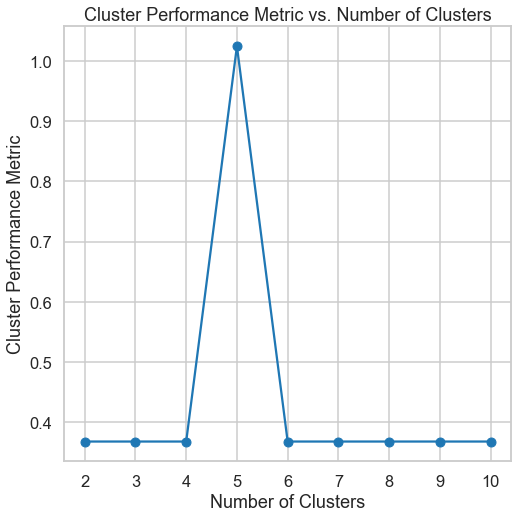

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Function to calculate the GUC_Kmean and return the cluster performance metric
def calculate_cluster_metric(num_clusters, data):
    # Generate random cluster centroids within the range of data points
    centroids = np.random.uniform(low=-1, high=1, size=(num_clusters, 2))
    
    # Apply GUC_Kmean function
    # (Assuming GUC_Kmean returns centroids and cluster_metric)
    centroids, cluster_metric = GUC_Kmean2(centroids, data, "Pearson")
    
    return cluster_metric

# Prepare the figure size and background
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_style("whitegrid")
sns.set_context("talk")

# Produce a data set (X1) representing the x and y coordinates of a circle
angle = np.linspace(0, 2*np.pi, 20, endpoint=False)
X1 = np.append([np.cos(angle)], [np.sin(angle)], axis=0).T

# Range of number of clusters
num_clusters_range = range(2, 11)

# Collect cluster performance metrics for each number of clusters
cluster_metrics = [calculate_cluster_metric(num_clusters, X3) for num_clusters in num_clusters_range]

# Plot the Cluster Performance Metric versus the number of clusters
plt.plot(num_clusters_range, cluster_metrics, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Performance Metric')
plt.title('Cluster Performance Metric vs. Number of Clusters')
plt.show()


## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

[[1.00000080e+08 1.00000079e+08]
 [1.00000117e+08 1.00000116e+08]
 [1.00000044e+08 1.00000043e+08]
 ...
 [1.00002036e+08 1.00002035e+08]
 [1.00002048e+08 1.00002047e+08]
 [1.00002024e+08 1.00002023e+08]]
[[1.00000079e+08 1.00000079e+08 1.00000079e+08]
 [1.00000116e+08 1.00000116e+08 1.00000116e+08]
 [1.00000043e+08 1.00000043e+08 1.00000044e+08]
 ...
 [1.00002035e+08 1.00002036e+08 1.00002036e+08]
 [1.00002047e+08 1.00002048e+08 1.00002048e+08]
 [1.00002023e+08 1.00002024e+08 1.00002024e+08]]
[[1.00000079e+08 1.00000080e+08 1.00000079e+08 1.00000079e+08]
 [1.00000116e+08 1.00000117e+08 1.00000116e+08 1.00000116e+08]
 [1.00000043e+08 1.00000044e+08 1.00000043e+08 1.00000043e+08]
 ...
 [1.00002036e+08 1.00002036e+08 1.00002036e+08 1.00002035e+08]
 [1.00002048e+08 1.00002048e+08 1.00002047e+08 1.00002047e+08]
 [1.00002024e+08 1.00002024e+08 1.00002024e+08 1.00002023e+08]]
[[1.00000078e+08 1.00000078e+08 1.00000078e+08 1.00000078e+08
  1.00000078e+08]
 [1.00000115e+08 1.00000115e+08 1.0000

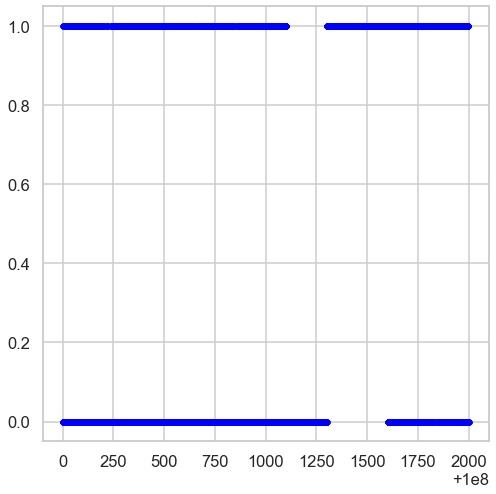

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame with the desired columns
data = pd.read_csv(r"C:/Users/yomna/Downloads/Customer_data.csv")

# Extract the data as a NumPy array
X = data.values

for num_clusters in range(2, 11):

    # Generate random cluster centroids within the range of data points
    Cluster_Centroids = np.random.uniform(low=-1, high=1, size=(num_clusters, X.shape[1]))

    # Apply GUC_Kmean2 function
    km_data = GUC_Kmean2(Cluster_Centroids, X, "Euclidean")

    # Display clusters using the display_cluster
    display_cluster(X, km_data)
    
    


In [66]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Function to calculate the GUC_Kmean and return the cluster performance metric
def calculate_cluster_metric(num_clusters, data):
    # Generate random cluster centroids within the range of data points
    centroids = np.random.uniform(low=-1, high=1, size=(num_clusters, 2))
    
    # Apply GUC_Kmean function
    # (Assuming GUC_Kmean returns centroids and cluster_metric)
    centroids, cluster_metric = GUC_Kmean2(centroids, data, "Euclidean")
    
    return cluster_metric

# Prepare the figure size and background
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_style("whitegrid")
sns.set_context("talk")

# Produce a data set (X1) representing the x and y coordinates of a circle
angle = np.linspace(0, 2*np.pi, 20, endpoint=False)
X1 = np.append([np.cos(angle)], [np.sin(angle)], axis=0).T

# Range of number of clusters
num_clusters_range = range(2, 11)

# Collect cluster performance metrics for each number of clusters
cluster_metrics = [calculate_cluster_metric(num_clusters, data) for num_clusters in num_clusters_range]

# Plot the Cluster Performance Metric versus the number of clusters
plt.plot(num_clusters_range, cluster_metrics, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Performance Metric')
plt.title('Cluster Performance Metric vs. Number of Clusters')
plt.show()


ValueError: operands could not be broadcast together with shapes (8,) (2,) 